# Imports

In [1]:
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

# Load Data

In [9]:
# Create pandas dataframe from csv
df_v1 = pd.read_csv("../logs/MainLog-1_WithTarjan.csv", sep=",", header=0)
df = pd.read_csv("../logs/MainLog-2_05.csv", sep=",", header=0)
print(df)

dfMinMaxK = pd.read_csv("../logs/OverviewMinMaxK.csv", sep=",", header=0)
dfNandMCount = pd.read_csv("../logs/NodesAndEdgesCount.csv", sep=",", header=0)

# Merge
dfWT = df_v1.merge(dfNandMCount, on = "name", how = 'inner')

# Split  synthetic/complex
df_v1Synthetic = df_v1[df_v1['name'].str.match('synth')]
df_v1Complex = df_v1[~df_v1['name'].str.match('synth')]
dfSynthetic = df[df['name'].str.match('synth')]
dfComplex = df[~df['name'].str.match('synth')]

# Mean
df_v1_mean_k = df_v1.groupby('k_optimal').mean()
df_mean_k = df.groupby('k_optimal').mean()

# Style plot
plt.style.use('dark_background')

                                 name  k_optimal  k_solved  millis  verified
0       synth-n_10-m_12-k_2-p_0.2.txt          0         0      22      True
1       synth-n_10-m_12-k_4-p_0.2.txt          1         1       3      True
2    synth-n_100-m_1009-k_2-p_0.2.txt          2         2      39      True
3    synth-n_100-m_1028-k_4-p_0.2.txt          4         4      45      True
4    synth-n_100-m_1107-k_6-p_0.2.txt          6         6     116      True
..                                ...        ...       ...     ...       ...
656                 wikispeedia-n_300         23        23      30      True
657                 wikispeedia-n_400         39         2  180000     False
658                 wikispeedia-n_500         59         0  180000     False
659                 wikispeedia-n_700         77         2  180000     False
660                 wikispeedia-n_800        110         0  180000     False

[661 rows x 5 columns]


# Print results

In [10]:
dfFalse = df[df['verified'] == False]
dfNoTimeout = dfFalse[dfFalse['millis'] < 180000]
print(dfNoTimeout)

numSynthetic = dfSynthetic.shape[0]
dfSyntheticSolved = dfSynthetic[dfSynthetic['verified'] == True]
numSyntheticSolved = dfSyntheticSolved.shape[0]
print("Synthetic: " + str(numSyntheticSolved) + "/" + str(numSynthetic)
      + " (" + str(numSyntheticSolved / numSynthetic) + "%)")

numComplex = dfComplex.shape[0]
dfComplexSolved = dfComplex[dfComplex['verified'] == True]
numComplexSolved = dfComplexSolved.shape[0]
print("Complex: " + str(numComplexSolved) + "/" + str(numComplex)
      + " (" + str(numComplexSolved / numComplex) + "%)")

numGeneral = df.shape[0]
dfSolved = df[df['verified'] == True]
numSolved = dfSolved.shape[0]
print("General: " + str(numSolved) + "/" + str(numGeneral)
      + " (" + str(numSolved / numGeneral) + "%)")

Empty DataFrame
Columns: [name, k_optimal, k_solved, millis, verified]
Index: []
Synthetic: 303/441 (0.6870748299319728%)
Complex: 151/220 (0.6863636363636364%)
General: 454/661 (0.686838124054463%)


# Line Plot k BFS

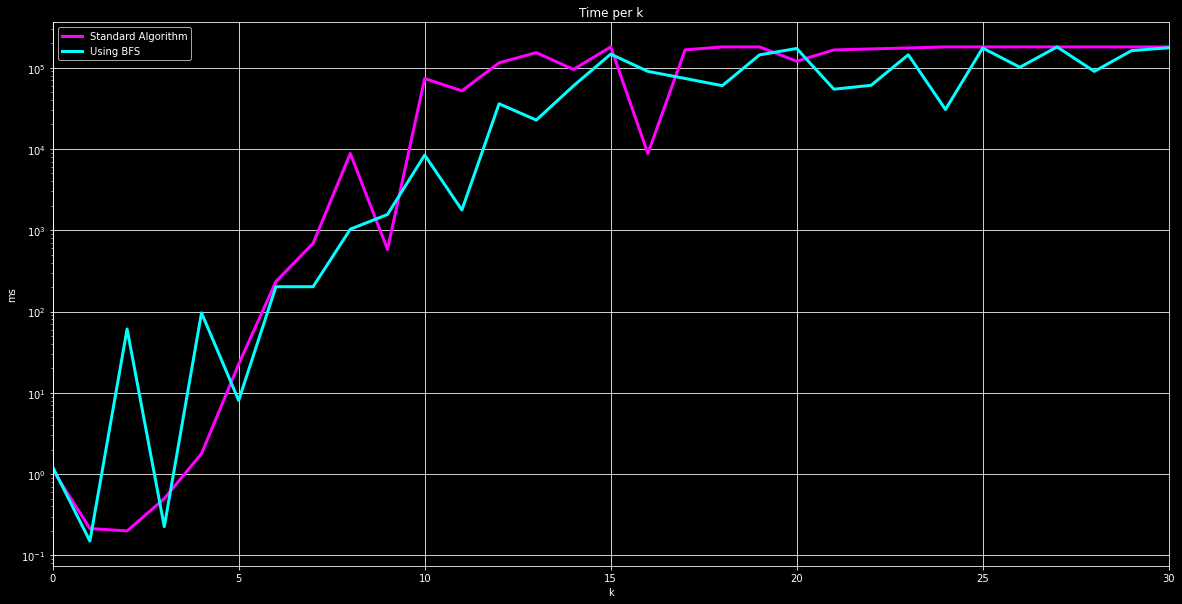

In [11]:

plt.figure(figsize=(20,10))
plt.plot(df_v1_mean_k['millis'], c='magenta', linewidth='3', label="Standard Algorithm")
plt.plot(df_mean_k['millis'], c='aqua', linewidth='3', label="Using BFS")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.xlim([0, 30])
plt.gca().set_yscale('log')
plt.grid()
plt.legend()
plt.savefig('plots/KLinePlotBFS.png',  bbox_inches='tight')
plt.show()

# Line Plot k (Complex vs Synthetic)

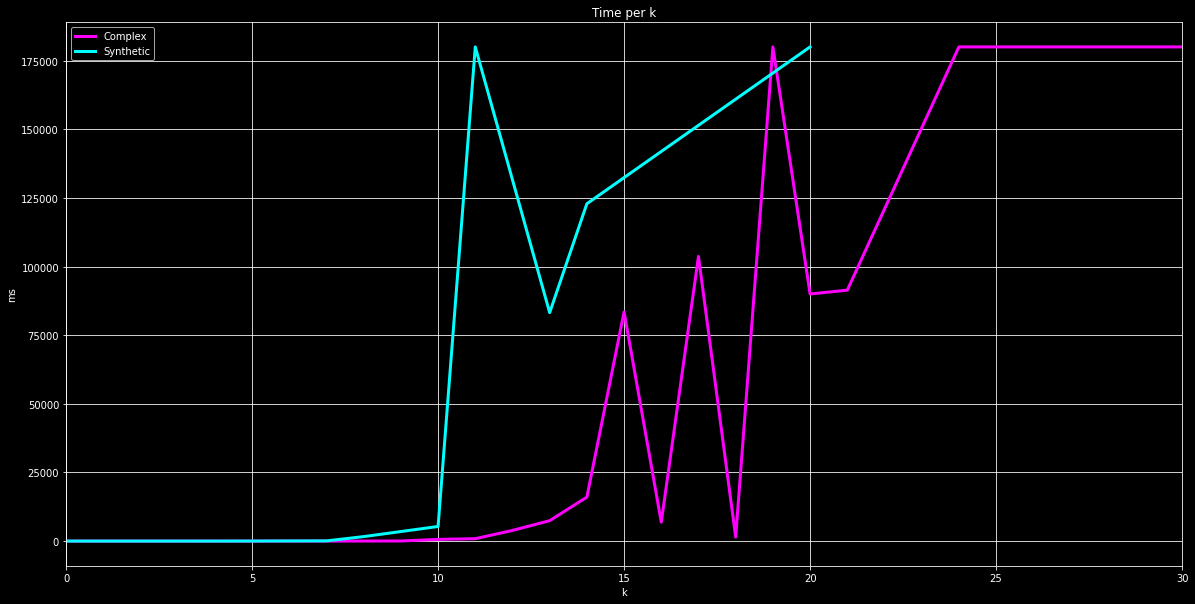

In [6]:
# Calculate mean for all k's
dfSyntheticMean = dfSynthetic.groupby('k_optimal').mean()
dfComplexMean = dfComplex.groupby('k_optimal').mean()

plt.figure(figsize=(20,10))
plt.plot(dfComplexMean['millis'], c='magenta', linewidth='3', label="Complex")
plt.plot(dfSyntheticMean['millis'], c='aqua', linewidth='3', label="Synthetic")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.xlim([0, 30])
plt.grid()
plt.legend()
#plt.savefig('plots/test.png',  bbox_inches='tight')
plt.show()